In [21]:
!pip3 install torch matplotlib ipywidgets numpy # or pip depending on your config

Output()

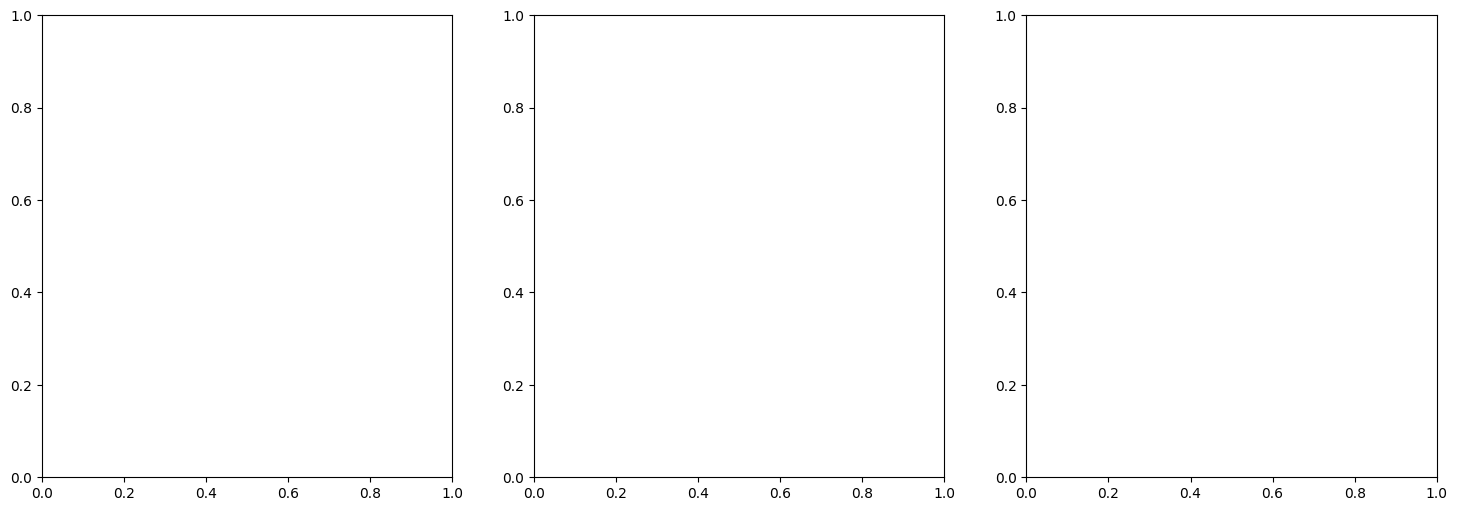

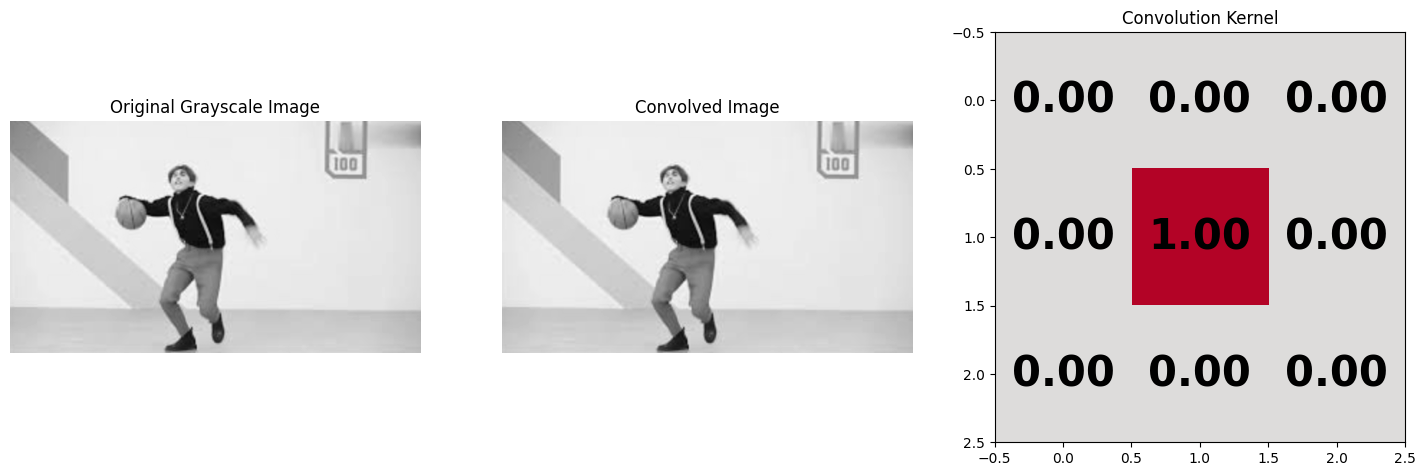

<Figure size 640x480 with 0 Axes>

In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import io

def load_and_preprocess_image(file):
    if isinstance(file, tuple):
        file = file[0]  # Get the first file if multiple files were uploaded
    img = Image.open(io.BytesIO(file['content']))
    img_gray = img.convert('L')
    img_tensor = torch.tensor(np.array(img_gray), dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    return img_tensor, img_gray

def apply_convolution(image_tensor, kernel):
    kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    convolved = F.conv2d(image_tensor, kernel_tensor, padding=1)
    return convolved.squeeze().numpy()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
img_tensor = None
img_gray = None

def update_output(change):
    global img_tensor, img_gray
    
    if change['name'] == 'value' and change['owner'] == image_upload:
        files = image_upload.value
        if files:
            img_tensor, img_gray = load_and_preprocess_image(files)
    
    if img_tensor is not None and img_gray is not None:
        kernel = [[float(kernel_00.value), float(kernel_01.value), float(kernel_02.value)],
                  [float(kernel_10.value), float(kernel_11.value), float(kernel_12.value)],
                  [float(kernel_20.value), float(kernel_21.value), float(kernel_22.value)]]
        
        convolved_img = apply_convolution(img_tensor, kernel)
        
        ax1.clear()
        ax2.clear()
        ax3.clear()
        
        ax1.imshow(img_gray, cmap='gray')
        ax1.set_title('Original Grayscale Image')
        ax1.axis('off')
        
        ax2.imshow(convolved_img, cmap='gray')
        ax2.set_title('Convolved Image')
        ax2.axis('off')
        
        # Visualize the kernel
        im = ax3.imshow(kernel, cmap='coolwarm', vmin=-1, vmax=1)
        ax3.set_title('Convolution Kernel')
        for i in range(3):
            for j in range(3):
                ax3.text(j, i, f'{kernel[i][j]:.2f}', ha='center', va='center', color='black', fontsize=30, fontweight='bold')
        
        plt.tight_layout()
        display(fig)

# Image upload widget
image_upload = widgets.FileUpload(accept='image/*', multiple=False)
image_upload.observe(update_output, names='value')

# Kernel input widgets
kernel_00 = widgets.FloatText(value=0.0, description='K[0,0]:', style={'description_width': 'initial'})
kernel_01 = widgets.FloatText(value=0.0, description='K[0,1]:', style={'description_width': 'initial'})
kernel_02 = widgets.FloatText(value=0.0, description='K[0,2]:', style={'description_width': 'initial'})
kernel_10 = widgets.FloatText(value=0.0, description='K[1,0]:', style={'description_width': 'initial'})
kernel_11 = widgets.FloatText(value=1.0, description='K[1,1]:', style={'description_width': 'initial'})
kernel_12 = widgets.FloatText(value=0.0, description='K[1,2]:', style={'description_width': 'initial'})
kernel_20 = widgets.FloatText(value=0.0, description='K[2,0]:', style={'description_width': 'initial'})
kernel_21 = widgets.FloatText(value=0.0, description='K[2,1]:', style={'description_width': 'initial'})
kernel_22 = widgets.FloatText(value=0.0, description='K[2,2]:', style={'description_width': 'initial'})

kernel_widgets = [kernel_00, kernel_01, kernel_02, kernel_10, kernel_11, kernel_12, kernel_20, kernel_21, kernel_22]
for widget in kernel_widgets:
    widget.observe(update_output, names='value')

# Create a widget to hold all the controls
controls = widgets.VBox([
    widgets.HBox([image_upload]),
    widgets.HTML(value="<h3>Enter 3x3 Convolution Kernel:</h3>"),
    widgets.HBox([kernel_00, kernel_01, kernel_02]),
    widgets.HBox([kernel_10, kernel_11, kernel_12]),
    widgets.HBox([kernel_20, kernel_21, kernel_22])
])

# Display controls and create an Output widget for the plot
output = widgets.Output()
display(controls, output)

# Update the plot inside the Output widget
def update_plot():
    with output:
        clear_output(wait=True)
        display(fig)

# Modify update_output to use update_plot
def update_output(change):
    global img_tensor, img_gray
    
    if change['name'] == 'value' and change['owner'] == image_upload:
        files = image_upload.value
        if files:
            img_tensor, img_gray = load_and_preprocess_image(files)
    
    if img_tensor is not None and img_gray is not None:
        kernel = [[float(kernel_00.value), float(kernel_01.value), float(kernel_02.value)],
                  [float(kernel_10.value), float(kernel_11.value), float(kernel_12.value)],
                  [float(kernel_20.value), float(kernel_21.value), float(kernel_22.value)]]
        
        convolved_img = apply_convolution(img_tensor, kernel)
        
        ax1.clear()
        ax2.clear()
        ax3.clear()
        
        ax1.imshow(img_gray, cmap='gray')
        ax1.set_title('Original Grayscale Image')
        ax1.axis('off')
        
        ax2.imshow(convolved_img, cmap='gray')
        ax2.set_title('Convolved Image')
        ax2.axis('off')
        
        # Visualize the kernel
        im = ax3.imshow(kernel, cmap='coolwarm', vmin=-1, vmax=1)
        ax3.set_title('Convolution Kernel')
        for i in range(3):
            for j in range(3):
                ax3.text(j, i, f'{kernel[i][j]:.2f}', ha='center', va='center', color='black', fontsize=30, fontweight='bold')
        
        plt.tight_layout()
        update_plot()

# Update observers
image_upload.observe(update_output, names='value')
for widget in kernel_widgets:
    widget.observe(update_output, names='value')
